[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Toon_et_al_1980/fig_1.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Toon_et_al_1980/fig_1.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Toon_et_al_1980/fig_1.ipynb)

based on Fig. 1 from [Toon, Turco & Pollack (1980): "A physical model of Titan’s clouds", Icarus 43(3)](https://doi.org/10.1016/0019-1035(80)90173-6) 

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
import numpy as np
from open_atmos_jupyter_utils import show_plot
from matplotlib import pyplot

from PySDM.physics import si, in_unit
from PySDM import Formulae

In [3]:
formulae = Formulae(
    hydrostatics='VariableGIsothermal',
    constants={
        'g_std': 117 * si.cm / si.s**2,
        'celestial_body_radius': 2.8e8 * si.cm,
    }
)

In [4]:
p0 = {}
p0['CH$_4$'] = 25 * si.mbar
p0['CH$_4$+N$_2$'] = 250 * si.mbar

molar_masses = {
    'CH$_4$': 16 * si.g / si.mol,
    'CH$_4$+N$_2$': 28 * si.g / si.mol,
}

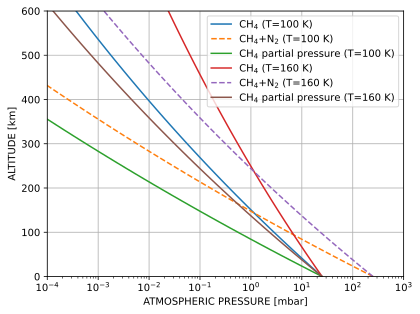

In [13]:
plot_z = np.linspace(0, 600 * si.km)
plot_ps = {}

for T in (100 * si.K, 160 * si.K):
    p = {}
    for key, molar_mass in molar_masses.items():
        p[key] = formulae.hydrostatics.pressure(plot_z, p0[key], temperature=T, molar_mass=molar_mass)
        plot_ps[f'{key} ({T=:.3g} K)'] = p[key]
        if key != 'CH$_4$':
            plot_ps[f'CH$_4$ partial pressure ({T=:.3g} K)'] = p[key] * p0['CH$_4$'] / p0[key]

for label, plot_p in plot_ps.items():
    pyplot.plot(
        in_unit(plot_p, si.mbar),
        in_unit(plot_z, si.km),
        label=label,
        linestyle='--' if '+' in label else '-'
    )
pyplot.xscale('log')
pyplot.xlim(1e-4, 1e3)
pyplot.ylim(0, 600)
pyplot.xlabel('ATMOSPHERIC PRESSURE [mbar]')
pyplot.ylabel('ALTITUDE [km]')
pyplot.grid()
pyplot.legend()
show_plot('fig_1.pdf')